# Projet 5 - OLIST
OLIST, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne cherche à définir une division de la clientèle à travers une modélisation des diverses données de ventes.

Le projet va se dérouler en trois etapes:
1. EDA
2. Modélisation
3. Simulation pour déterminer fréquence de mis à jour

### Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np

from IPython.display import display
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import os

### Import des fichiers

In [2]:
# affichage des fichiers disponibles
print(os.listdir("../data/raw/archive"))

['olist_sellers_dataset.csv', 'product_category_name_translation.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_products_dataset.csv']


In [3]:
# création variable path
path = '../data/raw/archive'

In [4]:
# import fichiers
orders = pd.read_csv(path + '/olist_orders_dataset.csv')
customers = pd.read_csv(path + '/olist_customers_dataset.csv')
items = pd.read_csv(path + '/olist_order_items_dataset.csv')
payments = pd.read_csv(path + '/olist_order_payments_dataset.csv')
reviews = pd.read_csv(path + '/olist_order_reviews_dataset.csv')
products = pd.read_csv(path + '/olist_products_dataset.csv')
sellers = pd.read_csv(path + '/olist_sellers_dataset.csv')
geoloc = pd.read_csv(path + '/olist_geolocation_dataset.csv')

### Fonctions

In [5]:
def traitement_dates(data, colonne) :
    ''' trasnformations des dates de l'ordre %Y-%m-%d %H:%M:%Sm 
    ARGS:
        data: dataframe
        colonne: colonne qui contient la date a traiter
    '''

    data[colonne] = pd.to_datetime(data[colonne], format='%Y-%m-%d %H:%M:%S')

In [6]:
def graphique_top_count(data, colonne):
    ''' Creation bar plot des top 10 des iteration d'une colonne données
    ARGS:
        data: dataframe
        colonne: colonne a itérer'''
    # count d'itérations des typologies de payments
    data_count = data[colonne].value_counts().reset_index()
    data_count.columns = [colonne, 'count']
    # top 10
    top_10_count = data_count.sort_values(by='count', ascending=False).head(10)
    # creation graphique
    sns.barplot(
        top_10_count,
        x=colonne,
        y='count',
    palette='Paired')

### EDA - Analyse exploratoire des données

#### Customers

In [7]:
# affichage dataframe
display(customers.head(3))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


Le df ``customers`` contient les informations à propos des clients
- ``customer_id`` : id donnée aux clients pour chaque ordre
- ``customer_unique_id`` : id unique pour identifier chaque client
- ``customer_zip_code_prefix`` : code postale du client
- ``customer_city`` : la ville du client au moment de l'ordre
- ``customer_state`` : l'état du client au moment de l'ordre 

In [8]:
# nombre de clients uniques
print(f'Il y a {customers.customer_id.nunique()} client unique dans le df customers')

Il y a 99441 client unique dans le df customers


**Où se trouvent les clients?**

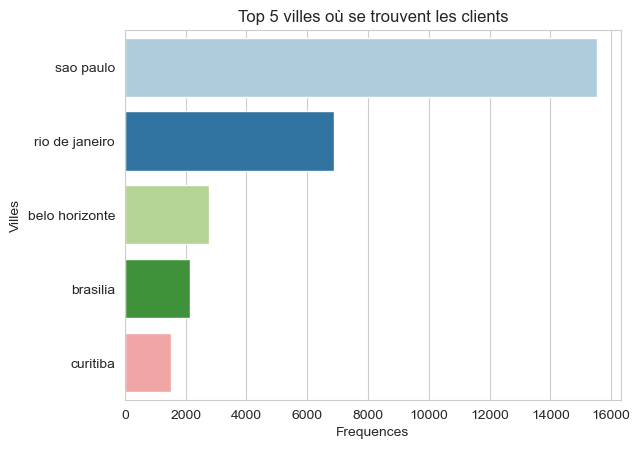

In [9]:
# count d'itérations des typologies de payments
customers_count = customers['customer_city'].value_counts().reset_index()
customers_count.columns = ['customer_city', 'count']
# top 5
top_5_count = customers_count.sort_values(by='count', ascending=False).head(5)
# creation graphique
plt.title('Top 5 villes où se trouvent les clients')
plt.ylabel('Villes')
plt.xlabel('Frequences')
sns.set(rc={"figure.figsize":(8, 9)})
sns.barplot(
    data=top_5_count,
    y='customer_city',
    x='count',
    orient='h',
    palette="Paired")
plt.show()

La majoritées des clients se trouvent à de ``Sao Paulo`` , ``Rio de Janeiro`` et ``Belo horizonte``.

Il sera donc interessante de concentrer les efforts publicitaires dans ce trois villes pour optimiser les côuts marketing.

### Orders

In [10]:
# affichage df
display(orders.head(3))

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


Le df ``orders`` contient des informations par rapport à chaque ordre
- ``order_id`` : id de chaque ordre
- ``customer_id`` : id du client
- ``order_status`` : situation concernant l'ordre
- ``order_purchase_timestamp`` : date et heure du moment où l'achat à eté effectué
- ``order_approved_at`` : date et heure de l'aprobation de l'ordre
- ``order_delivered_carrier_date`` : date et heure de la reception de l'envoi par le courier
- ``order_delivered_customer_date`` : date et heure de la reception par le client
- ``order_estimated_delivery_date`` : date et heure de l'estimation de reception du produit par le client

In [11]:
# transformation de dates en type datetime
traitement_dates(orders,'order_purchase_timestamp')
traitement_dates(orders,'order_approved_at')
traitement_dates(orders,'order_delivered_carrier_date')
traitement_dates(orders, 'order_delivered_customer_date')
traitement_dates(orders, 'order_estimated_delivery_date')

**Quel'est le nombre des commandes que sont arrivée en retard?**

In [12]:
# creation variable commandes en retard
ord_ret = []
# differenza tra data di arrivo e data stimata di arrivo
for index,row in orders.iterrows():
    # creation de la variable qui contient les differences entre dates
    difference = row['order_estimated_delivery_date'] - row['order_delivered_customer_date']
    
    # contorle des commandes en retard
    if difference.total_seconds()< 0:
        ord_ret.append(index)


In [13]:
# creation de variables
commandes_retard = len(ord_ret)
commandes_totales = orders['order_id'].nunique()
pourcentage_commandes = (commandes_retard/commandes_totales) * 100

# affichage de resultats     
print(f'il y à {commandes_retard} commande en rétard sur {commandes_totales} commandes soit le {round(pourcentage_commandes,2)} % de commandes totales')


il y à 7827 commande en rétard sur 99441 commandes soit le 7.87 % de commandes totales


C'est une marge de rétard acceptable sur le total des commandes effectuée par Olist.

### Payments

In [14]:
# affichage df
display(payments.head(3))

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


Le df ``payments`` contient des informations concernant notamment les méthodes des payement
- ``order_id`` : id l'ordre
- ``payment_sequential`` : indication des payment avec des autres méthodes de payment
- ``payement_type`` : typologie de payement
- ``payement_installation`` : combient de fois il faudra payer
- ``payement_value`` : valeur du payement

**Quel est le moyen de payement le plus utilisée par le clients de Olist?**

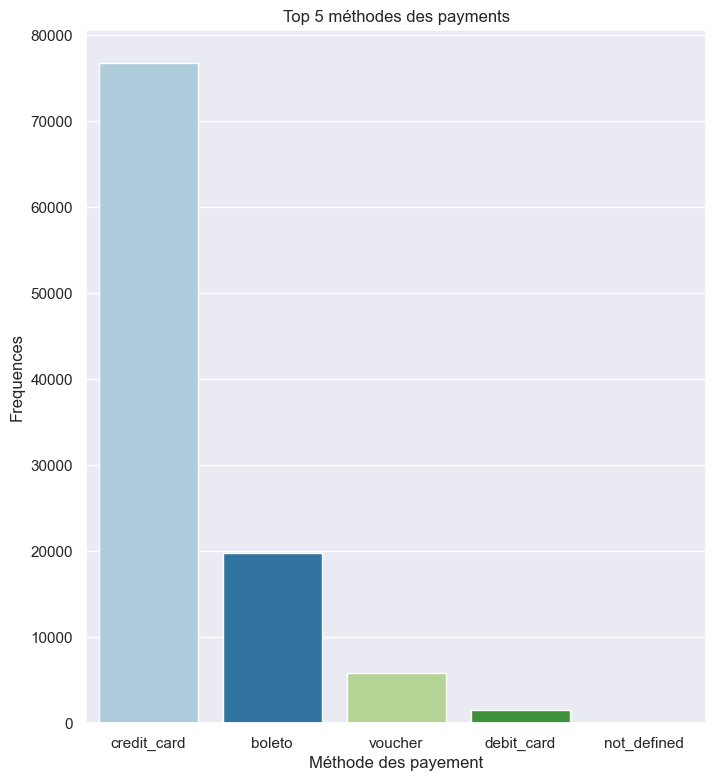

In [15]:
# graphique
graphique_top_count(payments,'payment_type')
plt.title('Top 5 méthodes des payments')
plt.xlabel('Méthode des payement')
plt.ylabel('Frequences')
plt.show()

La majorité des clients utilisent leur ``carte de credit`` comme méthode de payement quand ils effectuent des achat.

**En combien de fois les clients reglent leurs achat généralement?**

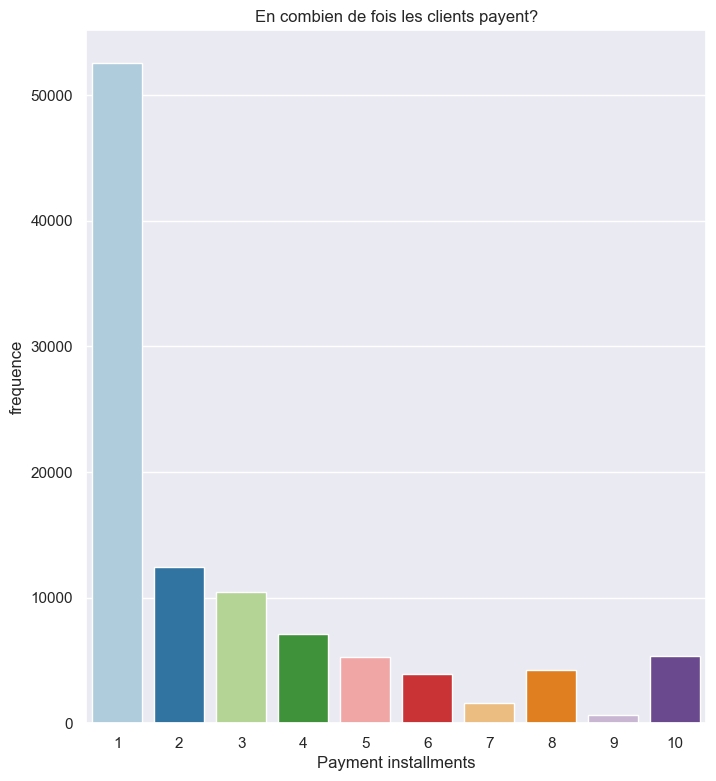

In [16]:
# graphique
graphique_top_count(payments, 'payment_installments')
plt.title('En combien de fois les clients payent?')
plt.xlabel('Payment installments')
plt.ylabel('frequence')
plt.show()

### Items

In [17]:
# affichage df
display(items.head(3))

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


Le df ``items`` contient des données sur les articles du panier des clients
- ``order_id`` : identificative de la commande
- ``order_item_id`` : identificative de l'article acheté
- ``productd_id`` : identificative du produit
- ``seller_id`` : identificative du vendeur
- ``shipping_limit_date`` : date et heure de la limit du periode de livraison
- ``price`` : prix de l'article
- ``freight_value``: prix du transport

### Products

In [18]:
# affichage df
display(products.head(3))

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


Le df ``products`` contient des données sur les produits
- ``products_id`` : identificative du produit
- ``products_category_name`` : catégorie du produit
- ``products_name_lenght`` : nombre de caractere du nom du produit
- ``products_descricption_lenght`` : nombre de caracthere de la descrption des produits
- ``products_photos_qty`` : quantitées de photos des produits
- ``products_weight_g`` : poids du produit
- ``products_lenght_cm`` : longueur du produit 
- ``products_height_cm`` : taille du produit
- ``products_width_cm`` : largeur du produit

### Reviews

In [19]:
# affichage reviewas
display(reviews.head(3))

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


Le df ``reviews`` contient des informations concernant les commentaires des clients
- ``review_id``: identificative du commentaire
- ``order_id`` : identificative de l'ordre
- ``review_score`` : note données aux produit
- ``review_comment_title``: titre du commentaire
- ``review_comment_message`` : message du commentaire
- ``review_creation_date`` : date et heure de la creation du commentaire
- ``review_answer_timestamp`` : date et heure de la reponse aux commentaires

**Comment sont réparties les notes?**

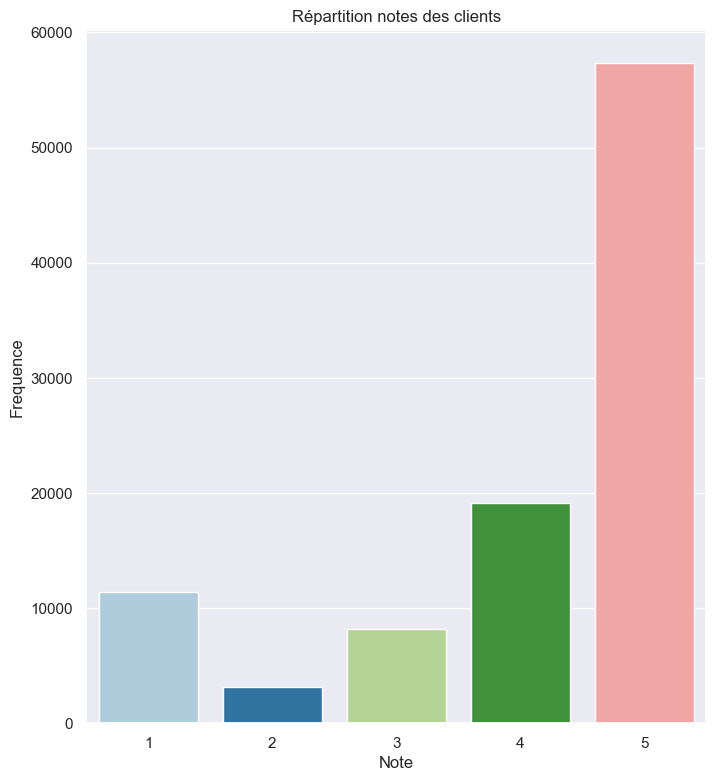

In [20]:
graphique_top_count(reviews,'review_score')
plt.title('Répartition notes des clients')
plt.xlabel('Note')
plt.ylabel('Frequence')
plt.show()

**Quels sont les mots plus utilisées dans les commentaires?**

Il y a des commentaires qui parles du faites que la commande n'a éte livrées, mais en générales on voit des commentaires positives.

### Sellers

In [21]:
# affichage sellers
display(sellers.head(3))

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


Le df ``sellers`` contient des informations concernants les vendeurs 
- ``seller_id`` : identificative du vendeur
- ``seller_zip_code_prefix`` : code zip de la ville du vendeur
- ``seller_city`` : ville du vendeur
- ``seller_state`` : états du vendeur

### Geolocalisation

In [22]:
# affichage geoloc
display(geoloc.head(3))

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


Le df ``geoloc`` contient les coordonnées des diverses villes brasiliens
- ``geolocation_zip_code_prefix`` : code porstale ville
- ``geolocation_lat`` : latitude
- ``geolocation_lng`` : longitude
- ``geolocation_city`` : indication ville
- ``geolocation_state`` : état 

### Jointures

In [23]:
# jointures entre variables
df = (
    customers[['customer_id','customer_city', 'customer_unique_id', 'customer_state']]
    .merge(orders, on='customer_id', how='left')
    .merge(payments, on='order_id', how='left' )
    .merge(items,on='order_id',how='left')
    .merge(sellers[['seller_id','seller_city','seller_state']], on='seller_id', how='left')
    .merge(reviews, on='order_id', how='left')
)

### Traitement des données

Contrôle des données pour vérifier la clé primaire à utiliser et donc traitement des données nulles suivi enfin par la sauvegarde du df.

In [24]:
# creation df avec des clients plus recentes
df_customers = df.sort_values('order_approved_at').drop_duplicates(['customer_unique_id'], keep='last')

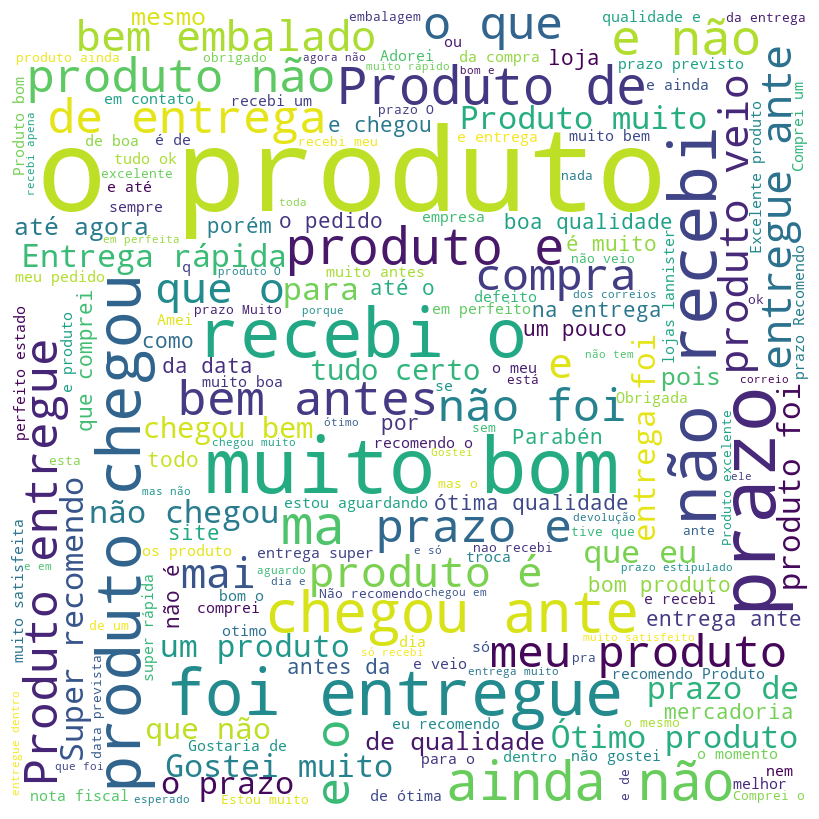

In [25]:
# drop des valeurs nan presentes dans la colonne avec les comments
review_clean = reviews.dropna(subset=['review_comment_message'])
# cominer tous les mots en une seul string
tous_commentaires = ' '.join(review_clean['review_comment_message'])
# creations de la wordcloud
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(tous_commentaires)
# affichage wordcloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Sauvegarde du DF

In [26]:
# sauvegarde df
df.to_csv('../data/processed/df_nc.csv', index=False)
#df_customers.to_csv('../data/processed/df_customers.csv', index=False)